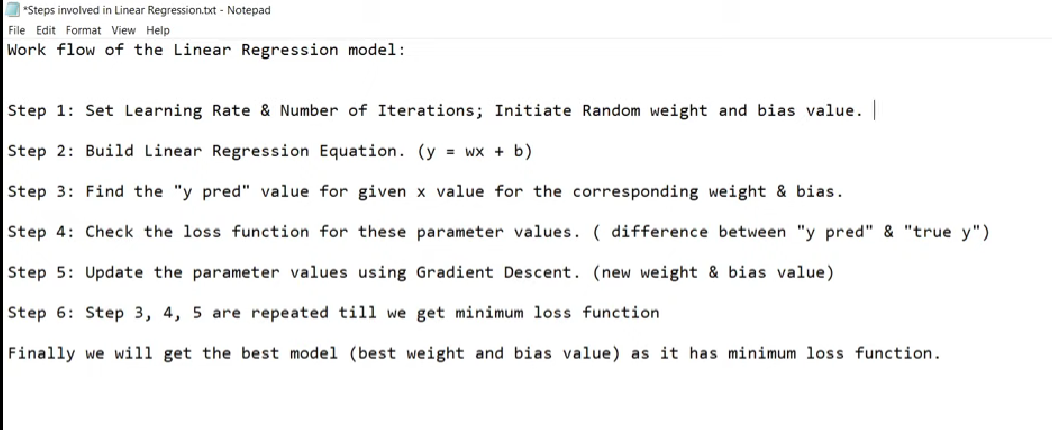

In [1]:
import numpy as np

model parameters : parameters we cannot give and are given by model.

hyper parameters : parameters given by us.

In [2]:
brr =[]
arr =[]
class LinearRegression():
#     initaing parametres.
    def __init__(self , learning_rate , no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
        
    
    #fitting the data in model.
    def fit(self ,X ,y):
    #no. of datapoints in dataset --> m.
    #no. of input features in dataset --> n.        
        self.m , self.n = X.shape
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
#         implemeting gradient descendent
        for i in range(self.no_of_iteration):
           self.update_weights()
            
    def update_weights(self):
        y_pred = self.predict(self.X)
        
        #calculate gradient.
        dw = -(2*(self.X.T).dot(self.y - y_pred))/self.m
        
        db = -2*np.sum(self.y - y_pred)/self.m
        
        #updating weights.
        
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        arr.append(self.w)
        brr.append(self.b)
         

    def predict(self,X):
        return X.dot(self.w) + self.b

In [9]:
print(X.shape,y.shape,df.shape)

(30, 1) (30,) (30, 2)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('salary_data.csv')
df.head()
# df.tail()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
df.shape

(30, 2)

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
X = df[['YearsExperience']].values
# df.iloc[:,:-1].values ==> takes only 1st column.
y = df['Salary'].values
# df.iloc[:,1].values ==> takes 2nd column.

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3)

## training Linear regression model.

In [14]:
print(X_train,y_test)

[[ 1.1]
 [ 2.2]
 [ 5.1]
 [ 2.9]
 [ 4.1]
 [ 4. ]
 [ 7.9]
 [ 1.3]
 [ 1.5]
 [ 9. ]
 [ 2. ]
 [ 7.1]
 [ 9.5]
 [ 5.9]
 [10.5]
 [ 6.8]
 [ 3.2]
 [ 3.9]
 [ 4.5]
 [ 6. ]
 [ 3. ]] [112635  67938 113812  83088  64445  57189 122391 109431  56957]


In [60]:
model = LinearRegression(learning_rate = 0.02,no_of_iteration = 100)
model.fit(X_train, y_train)

In [47]:
np.shape(brr)

(1000,)

In [61]:
arr

[array([16525.3632381]),
 array([12126.54525006]),
 array([13241.32829888]),
 array([12903.78576979]),
 array([12949.32128762]),
 array([12894.33214496]),
 array([12866.23585912]),
 array([12831.45616215]),
 array([12798.83604803]),
 array([12766.04176588]),
 array([12733.68448966]),
 array([12701.59948911]),
 array([12669.82650695]),
 array([12638.35144521]),
 array([12607.17442635]),
 array([12576.2918599]),
 array([12545.70116732]),
 array([12515.39953675]),
 array([12485.3842508]),
 array([12455.65259985]),
 array([12426.20190464]),
 array([12397.02950993]),
 array([12368.13278595]),
 array([12339.50912767]),
 array([12311.1559547]),
 array([12283.07071103]),
 array([12255.25086481]),
 array([12227.69390811]),
 array([12200.39735669]),
 array([12173.3587498]),
 array([12146.57564995]),
 array([12120.04564266]),
 array([12093.76633628]),
 array([12067.73536176]),
 array([12041.95037243]),
 array([12016.40904382]),
 array([11991.10907339]),
 array([11966.04818037]),
 array([11941.224

In [62]:
brr

[2842.293333333333,
 2375.991373968254,
 2778.779637331809,
 2949.931647388133,
 3179.495799332889,
 3391.0738517523832,
 3604.8200163232636,
 3815.4482829064273,
 4024.375493573691,
 4231.252171211827,
 4436.194009625884,
 4639.193914573024,
 4840.276923428998,
 5039.4593884819,
 5236.759733534605,
 5432.195621765507,
 5625.784703980752,
 5817.5444234727875,
 6007.492069428687,
 6195.644764830856,
 6382.019471599286,
 6566.632991172469,
 6749.501966271862,
 6930.642882336386,
 7110.072069025906,
 7287.805701688773,
 7463.8598028212145,
 7638.250243511425,
 7810.992744870414,
 7982.102879449225,
 8151.596072642791,
 8319.487604080516,
 8485.79260900371,
 8650.52607963003,
 8813.702866504995,
 8975.33767984076,
 9135.445090842222,
 9294.039533020592,
 9451.13530349457,
 9606.746564279209,
 9760.887343562606,
 9913.571536970536,
 10064.812908819113,
 10214.625093355638,
 10363.021595987715,
 10510.015794500741,
 10655.620940263902,
 10799.850159424766,
 10942.716454092604,
 11084.2327035

In [41]:
for i in range (1,)
  print(arr[0])

[16525.3632381]


In [35]:
# list1 =["hello","World","!!"]
# list2 =["hello","Aaditya","!!!"]
# list3= list1+list2
# # print(list3)

In [ ]:
print(model.w[0],model.b)

In [ ]:
ypred=model.predict(X_test)
ypred

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test , ypred)

In [ ]:
plt.scatter(X_test , y_test,c='r')
plt.plot(X_test , ypred , c='b')

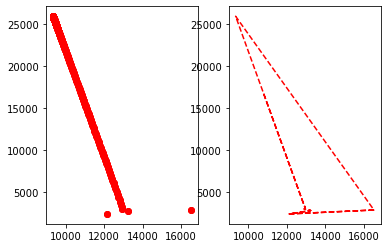

In [72]:
plt.subplot(1,2,1)
plt.scatter(arr , brr,c='r')
plt.subplot(1,2,2)
plt.plot(arr , brr,c='r',linestyle='--')